## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Importing the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\7.xor.csv",header=None) 
df.head() 

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [3]:
#renaming columns properly
df.columns=["f_1","f_2","label"] 
df.head() 

,f_1,f_2,label
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
df["label"]=np.where(df["label"]==-1.0,0,1)
df.head() 

,f_1,f_2,label
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


## checking label counts

In [5]:
df["label"].value_counts() 

0    260
1    240
Name: label, dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     500 non-null    float64
 1   f_2     500 non-null    float64
 2   label   500 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.9 KB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='f_1'>

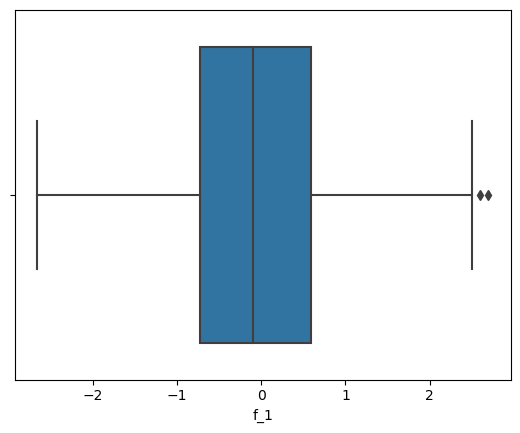

In [7]:
sns.boxplot(df["f_1"])  

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='f_2'>

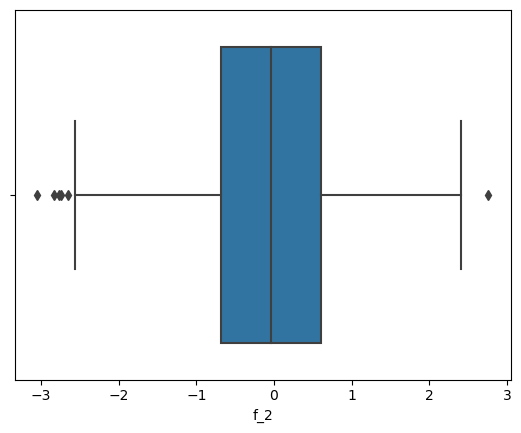

In [8]:
sns.boxplot(df["f_2"]) 

## splitting the data into input and output features 

In [9]:
x=df[["f_1","f_2"]] 
y=df["label"].astype(int)

In [10]:
x.head()  

,f_1,f_2
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


In [11]:
y.head()  

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int32

## Split the data into train and test

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [13]:
x_train.shape  

(450, 2)

In [14]:
x_test.shape 

(50, 2)

## Standardising input features 

In [15]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

## Build the Logical Structure


In [16]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 

In [17]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 18)                378       
                                                                 
 dense_2 (Dense)             (None, 16)                304       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 759 (2.96 KB)
Trainable params: 759 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1) 

Epoch 1/35
41/41 [==============================] - 2s 12ms/step - loss: 0.7284 - accuracy: 0.6074 - val_loss: 0.7142 - val_accuracy: 0.7556
Epoch 2/35
41/41 [==============================] - 0s 4ms/step - loss: 0.7225 - accuracy: 0.7012 - val_loss: 0.7074 - val_accuracy: 0.8000
Epoch 3/35
41/41 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.7432 - val_loss: 0.7011 - val_accuracy: 0.8444
Epoch 4/35
41/41 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.7901 - val_loss: 0.6949 - val_accuracy: 0.8444
Epoch 5/35
41/41 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.8123 - val_loss: 0.6883 - val_accuracy: 0.8889
Epoch 6/35
41/41 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.8296 - val_loss: 0.6817 - val_accuracy: 0.8889
Epoch 7/35
41/41 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.8321 - val_loss: 0.6744 - val_accuracy: 0.8222
Epoch 8/35
41/41 [=

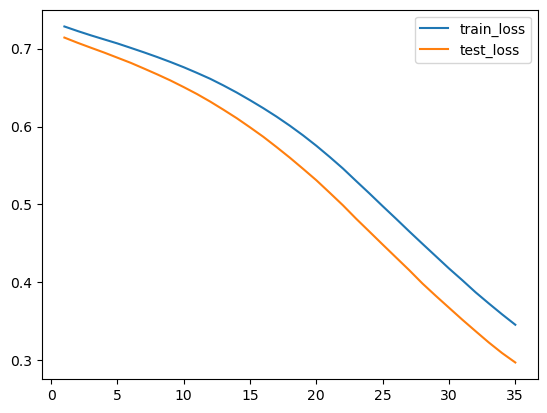

In [19]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [20]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 4ms/step


array([[0.85606277],
       [0.13205364],
       [0.12183167],
       [0.6371406 ],
       [0.87278706],
       [0.12508056],
       [0.71564156],
       [0.75560606],
       [0.46873274],
       [0.94898015],
       [0.19165295],
       [0.0881573 ],
       [0.7796797 ],
       [0.09097763],
       [0.8632135 ],
       [0.9733044 ],
       [0.67432296],
       [0.03082318],
       [0.26496315],
       [0.3550544 ],
       [0.6020171 ],
       [0.36559865],
       [0.9949892 ],
       [0.49645114],
       [0.91511554],
       [0.06253609],
       [0.7392503 ],
       [0.5120988 ],
       [0.34131122],
       [0.4660405 ],
       [0.15866707],
       [0.367117  ],
       [0.5802433 ],
       [0.74059933],
       [0.25728586],
       [0.64243454],
       [0.36737534],
       [0.01936664],
       [0.26402518],
       [0.17814401],
       [0.20016237],
       [0.52784675],
       [0.9807757 ],
       [0.22480169],
       [0.39669514],
       [0.27899253],
       [0.21932521],
       [0.132

In [21]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

## Evaluating the model 

0.96


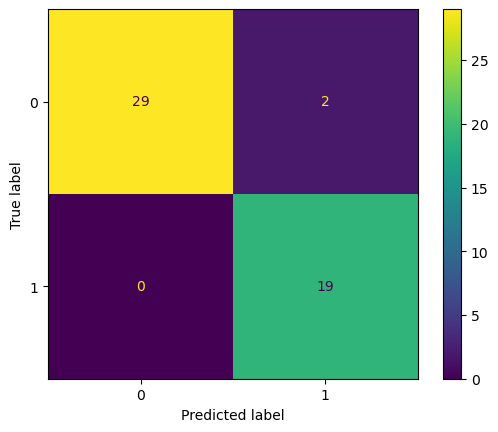

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTING THE DECISION SURFACE 

In [23]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

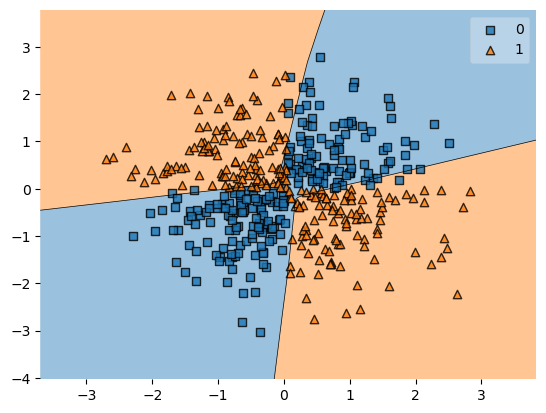

In [24]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

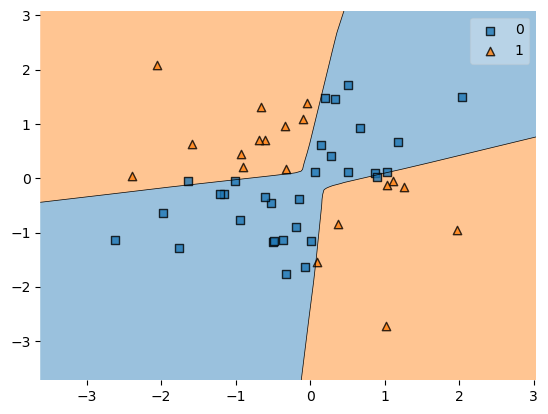

In [25]:
plot_decision_regions(x_test,y_test.values,clf=model) 

## Conclusions:

###### This neural network model achieves an accuracy of 92%. The model architecture consists of 3 hidden layers:- 

- 1st HL:- 20 neurons ReLU as activation function and an L2 regularizer with a strength of 0.001.
- 2nd HL:- 18 neurons ReLU as activation function and an L2 regularizer with a strength of 0.001.
- 3rd HL:- 16 neurons ReLU as activation function and an L2 regularizer with a strength of 0.001.

###### The output layer uses the sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 35 epochs.
 
